In [ ]:
#################################################
# author : donggeon
# date : 2022.12.22
# title : churn rate prediction
# describe : predict telecom churn rate with logistic regression
#################################################

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.api import Logit
from statsmodels.tools import add_constant
import statsmodels.api as sm
from sklearn import metrics

import seaborn as sns


print("process end...")

process end...


In [83]:
import warnings
warnings.filterwarnings("ignore")

print("process end...")

process end...


In [84]:
plt.style.use(["seaborn-whitegrid"])
# pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

print("process end...")

process end...


In [85]:
# 데이터 
churn = pd.read_csv('./churn_data.csv')
customer = pd.read_csv('./customer_data.csv')
internet = pd.read_csv('./internet_data.csv')

print("process end...")

process end...


In [86]:
churn.sample(5)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
618,5240-CAOYT,57,Yes,Month-to-month,Yes,Bank transfer (automatic),87.55,4884.85,No
428,4360-PNRQB,18,Yes,Month-to-month,Yes,Bank transfer (automatic),75.60,1395.05,No
4965,9239-ZBZZV,6,No,Month-to-month,Yes,Electronic check,47.95,305.1,Yes
1209,8268-YDIXR,56,Yes,One year,Yes,Electronic check,93.15,5253.95,No
2631,6861-XWTWQ,7,Yes,Month-to-month,Yes,Electronic check,99.25,665.45,Yes


In [87]:
customer.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
5180,0361-HJRDX,Female,0,No,No
6806,4933-BSAIP,Female,0,Yes,No
3961,7421-ZLUPA,Female,0,No,No
3957,2019-HDCZY,Male,0,Yes,No
6873,6369-MCAKO,Female,0,Yes,Yes


In [88]:
internet.sample(5)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
6496,2474-BRUCM,Yes,Fiber optic,Yes,No,No,No,Yes,Yes
6311,3162-KKZXO,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
1704,0107-YHINA,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
289,3580-REOAC,No,DSL,No,No,No,No,No,No
488,4472-LVYGI,No phone service,DSL,Yes,No,Yes,Yes,Yes,No


In [89]:
print('데이터 수')
print('chrurn', len(churn))
print('customer', len(customer))
print('internet', len(internet))

데이터 수
chrurn 7042
customer 7042
internet 7042


In [90]:
# 데이터 마다 customerID값이 모두 같은지 확인.
print(set(churn.customerID) == set(customer.customerID))
print(set(churn.customerID) == set(internet.customerID))
print(set(customer.customerID) == set(internet.customerID))

True
True
True


In [91]:
#데이터 합치기

df = pd.merge(churn, customer, how='left', on='customerID')

df.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No


In [92]:
#데이터 합치기
df = pd.merge(df, internet, how='left', on='customerID')

df.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No


In [93]:
# 결측치 확인
df.isna().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [94]:
df.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [95]:
# 데이터 크기
len(df)

7042

In [96]:
# na를 찾는 함수에서는 na가 없다고 나왔지만 'TotalCharges'컬럼에서 ' '값이 있어 분석을 진행 할 수 없었음.
# ' '값 있는 행 없애기

In [97]:
# pd.to_numeric(df['TotalCharges'])

In [98]:
# ' '값 None으로 변경

(df['TotalCharges'] == ' ').sum()

df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [99]:
df.isna().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

In [100]:
# 전체 7042의 데이터중 11개의 결측치가 포함된 행이 있음
# 결측치가 있는 행이 적어서 빼고 진행해도 괜찮다고 판단.
df = df.dropna()

In [101]:
df[['Churn','customerID']].groupby('Churn').count().reset_index().rename(columns={'customerID':'count'})

,Churn,count
0,No,5162
1,Yes,1869


In [102]:
# 수치형 자료 확인

In [103]:
def get_boxplot(df,ax):
    ax = sns.boxplot(df, ax=ax, palette="Reds", 
                       medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                     width = 0.4, notch=True,
                     boxprops = dict(linestyle='-', linewidth=2))
    return ax

In [104]:
def dist_plot(df, plots=1):
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    ax[0] = get_boxplot(df, ax[0])
    ax[1] = sns.distplot(df, ax=ax[1], kde_kws={"color": "y"},  hist_kws={"histtype": "step", "color": "k"})
    ax[1].axvline(x = df.mean(), color = 'r', linewidth=1.5, linestyle='--', label='mean')
    ax[1].axvline(x = df.median(), color = 'g', linewidth=1.5, linestyle='--', label='median')
    ax[1].set(xlabel = df.name, ylabel='frequency', title='Histogram of ' + df.name)
    plt.legend()
    plt.tight_layout()

In [105]:
con_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

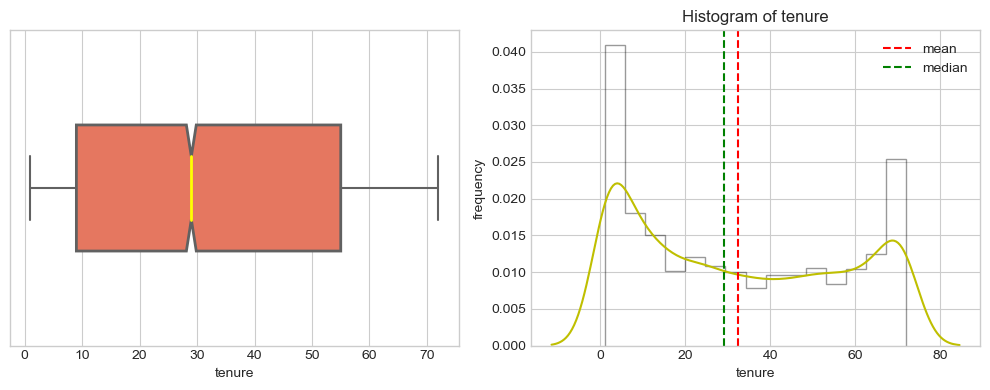

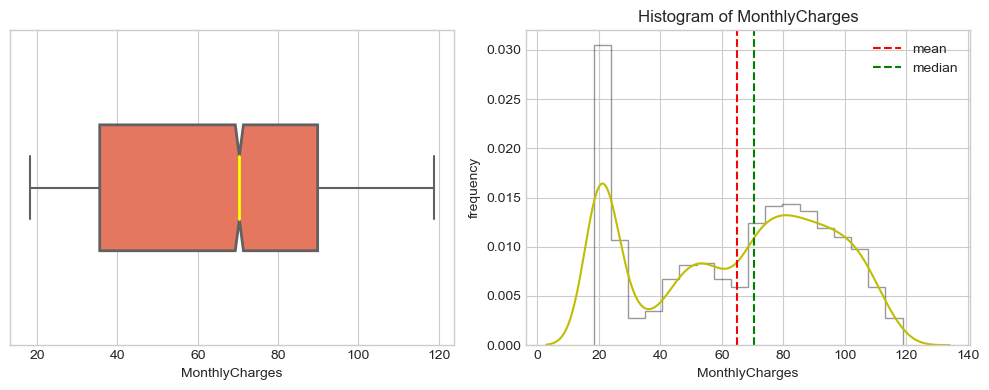

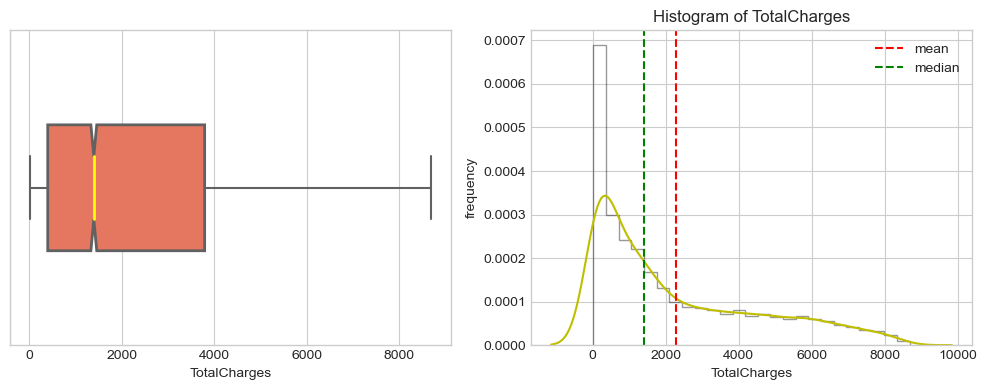

In [106]:
for col in con_cols:
    dist_plot(df[col])
    
# 'TotalCharges'의 경우 큰 값이 존재해서 log를 취해보기로함

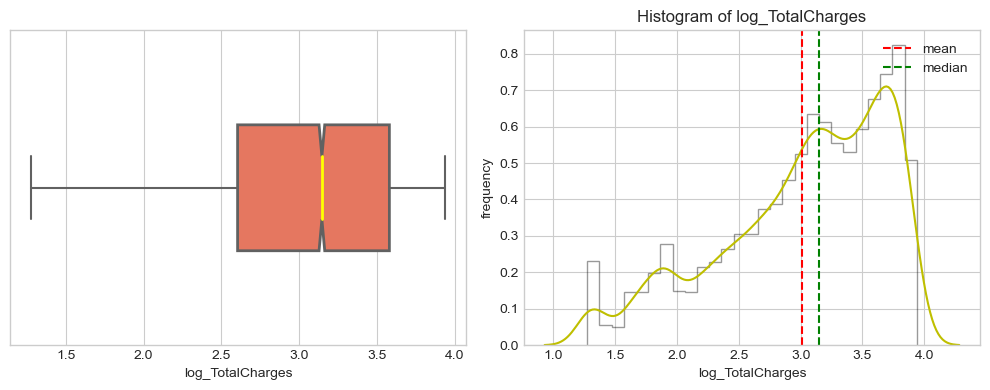

In [107]:
# 로그를 취함
df['log_TotalCharges'] = np.log10(df['TotalCharges'])
dist_plot(df['log_TotalCharges'])

con_cols.append('log_TotalCharges')

In [108]:
# 수치형 자료가 아닌 자료 확인

In [109]:
cat_cols = set(df.columns) - set(con_cols) - {'customerID', 'Churn'}

In [110]:
y = df['Churn']

In [111]:
cat_cols = list(cat_cols)

In [112]:
# 변수가 너무 많아서 변수간의 선형관계를 보고 변수를 줄이기로 생각

In [113]:
df.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,log_TotalCharges
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1.474944
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,3.276347


In [114]:
# 범주형 자료의 값을 각각 열로 추가
df_dummies = pd.get_dummies(df, columns=cat_cols)
df_dummies.head(2)

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,log_TotalCharges,SeniorCitizen_0,SeniorCitizen_1,Contract_Month-to-month,Contract_One year,Contract_Two year,PhoneService_No,PhoneService_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,gender_Female,gender_Male,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_No,PaperlessBilling_Yes,Dependents_No,Dependents_Yes,Partner_No,Partner_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,29.85,29.85,No,1.474944,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0
1,5575-GNVDE,34,56.95,1889.50,No,3.276347,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0


In [115]:
df[['customerID']+con_cols]

,customerID,tenure,MonthlyCharges,TotalCharges,log_TotalCharges
0,7590-VHVEG,1,29.85,29.85,1.474944
1,5575-GNVDE,34,56.95,1889.50,3.276347
2,3668-QPYBK,2,53.85,108.15,2.034027
3,7795-CFOCW,45,42.30,1840.75,3.264995
4,9237-HQITU,2,70.70,151.65,2.180842
...,...,...,...,...,...
7037,2569-WGERO,72,21.15,1419.40,3.152105
7038,6840-RESVB,24,84.80,1990.50,3.298962
7039,2234-XADUH,72,103.20,7362.90,3.867049
7040,4801-JZAZL,11,29.60,346.45,2.539641


In [116]:
df_dummies = df_dummies.drop(columns=['tenure', 'MonthlyCharges','TotalCharges','Churn', 'log_TotalCharges'])

In [117]:
df_dummies_all = pd.merge(df[['customerID', 'Churn']+con_cols], df_dummies, how='left', on='customerID')
df_dummies_all.head(2)

,customerID,Churn,tenure,MonthlyCharges,TotalCharges,log_TotalCharges,SeniorCitizen_0,SeniorCitizen_1,Contract_Month-to-month,Contract_One year,Contract_Two year,PhoneService_No,PhoneService_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,gender_Female,gender_Male,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_No,PaperlessBilling_Yes,Dependents_No,Dependents_Yes,Partner_No,Partner_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,No,1,29.85,29.85,1.474944,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0
1,5575-GNVDE,No,34,56.95,1889.50,3.276347,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0


In [118]:
df_dummies_all.columns

Index(['customerID', 'Churn', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'log_TotalCharges', 'SeniorCitizen_0', 'SeniorCitizen_1',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PhoneService_No', 'PhoneService_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'StreamingMovies_No',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes', 'gender_Female',
       'gender_Male', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',


In [119]:
df_dummies_all['y'] = (df_dummies_all['Churn'] == 'Yes') + 0

In [120]:
# 값이 'no'인 변수 삭제

df_dummies1 = df_dummies_all.drop(columns=['gender_Female', 'Partner_No', 'TechSupport_No', 'InternetService_No', 'OnlineSecurity_No', 'StreamingTV_No',
                             'PaperlessBilling_No', 'StreamingMovies_No', 'DeviceProtection_No', 'OnlineBackup_No',
                             'MultipleLines_No', 'Dependents_No', 'SeniorCitizen_0', 'PhoneService_No'])

In [121]:
# 칼럼이름에 스페이스가 있어 언더바로 바꿈
print(df_dummies1.columns)
new_col_name = []

for i in range(len(df_dummies1.columns)):
    new_col_name.append(df_dummies1.columns[i].replace(' ', '_').replace('-','_'))
    
df_dummies1.columns = new_col_name

print(df_dummies1.columns)

Index(['customerID', 'Churn', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'log_TotalCharges', 'SeniorCitizen_1', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PhoneService_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes', 'gender_Male',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PaperlessBilling_Yes', 'Dependents_Yes', 'Partner_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic', 'y'],
      dtype='ob

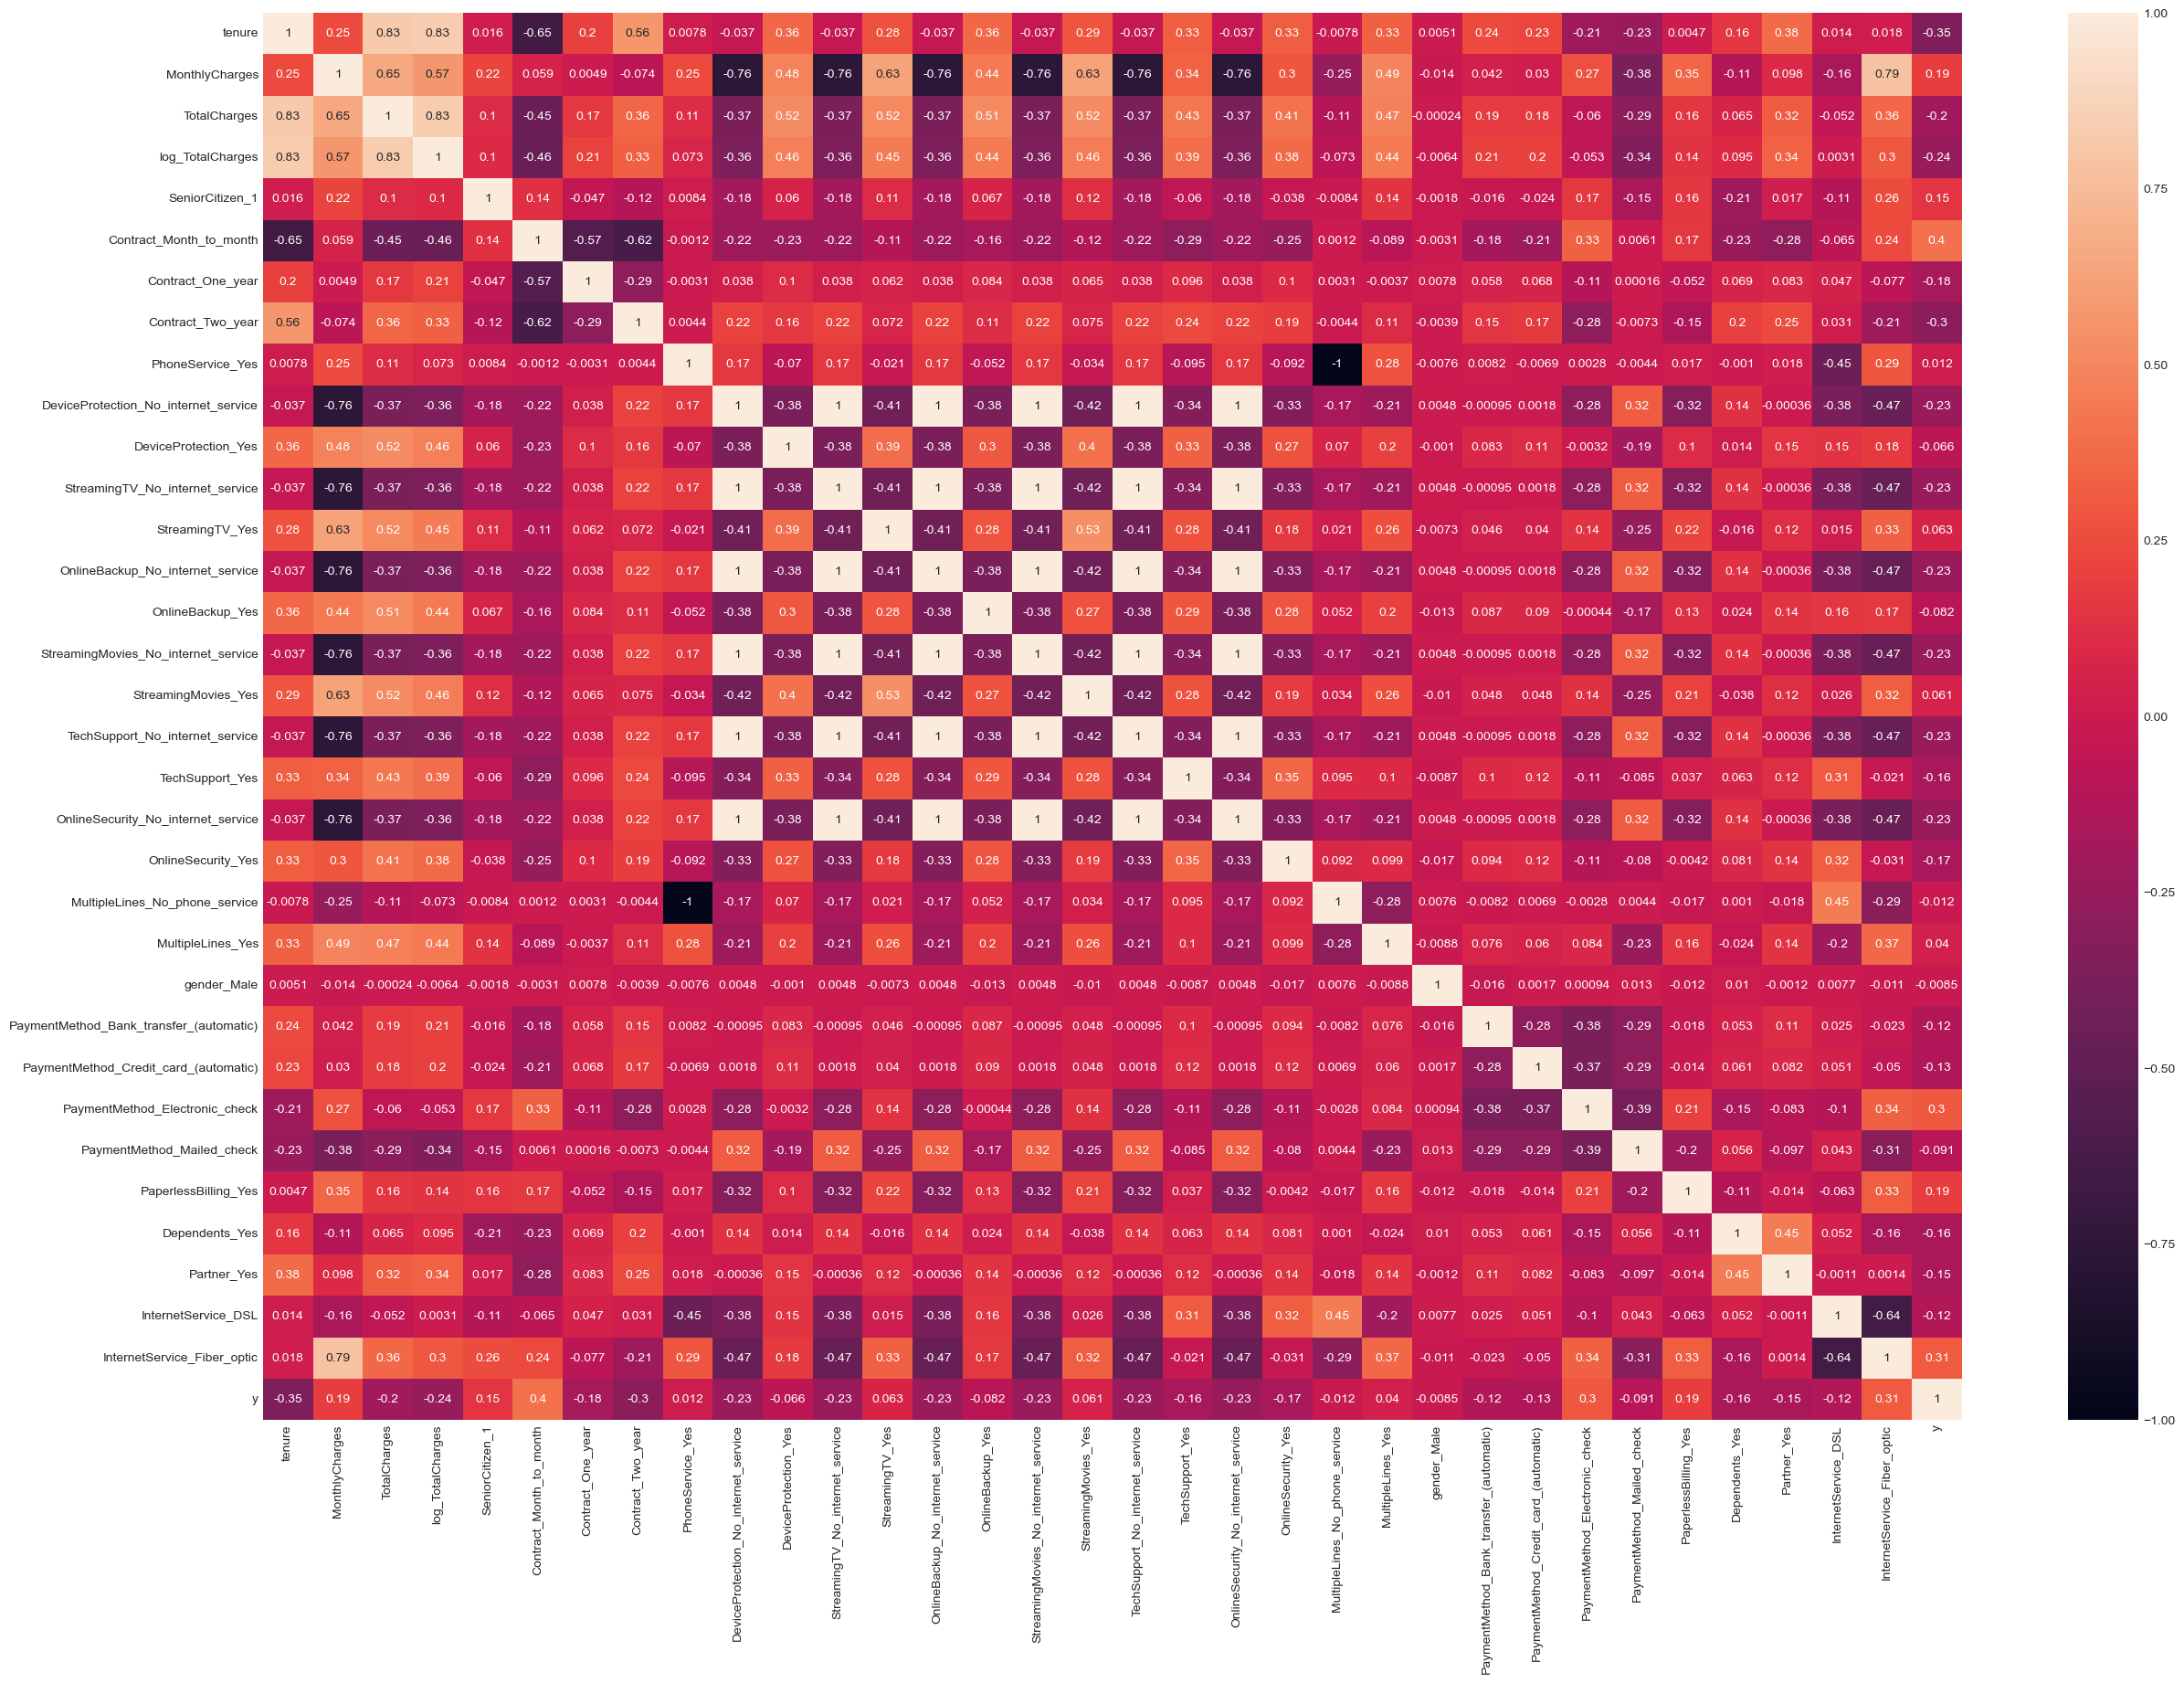

In [122]:
# 변수 삭제 후 선형관계 확인

plt.figure(figsize=(30,20))
sns.heatmap(df_dummies1.corr(), annot=True)
plt.show()

# 값이 'No internet service'인 독립변수끼리 correlation이 1이 나옴

In [123]:
# 값이 'No internet service'인 변수 삭제
# no_internet_service 변수를 만듦

df_dummies2 = df_dummies1.drop(columns=['TechSupport_No_internet_service', 'OnlineSecurity_No_internet_service',
                                              'StreamingTV_No_internet_service', 'StreamingMovies_No_internet_service',
                                              'DeviceProtection_No_internet_service'])

df_dummies2.rename(columns={'OnlineBackup_No_internet_service':'no_IS'}, inplace=True)
df_dummies2.columns
cat_cols.append('no_IS')

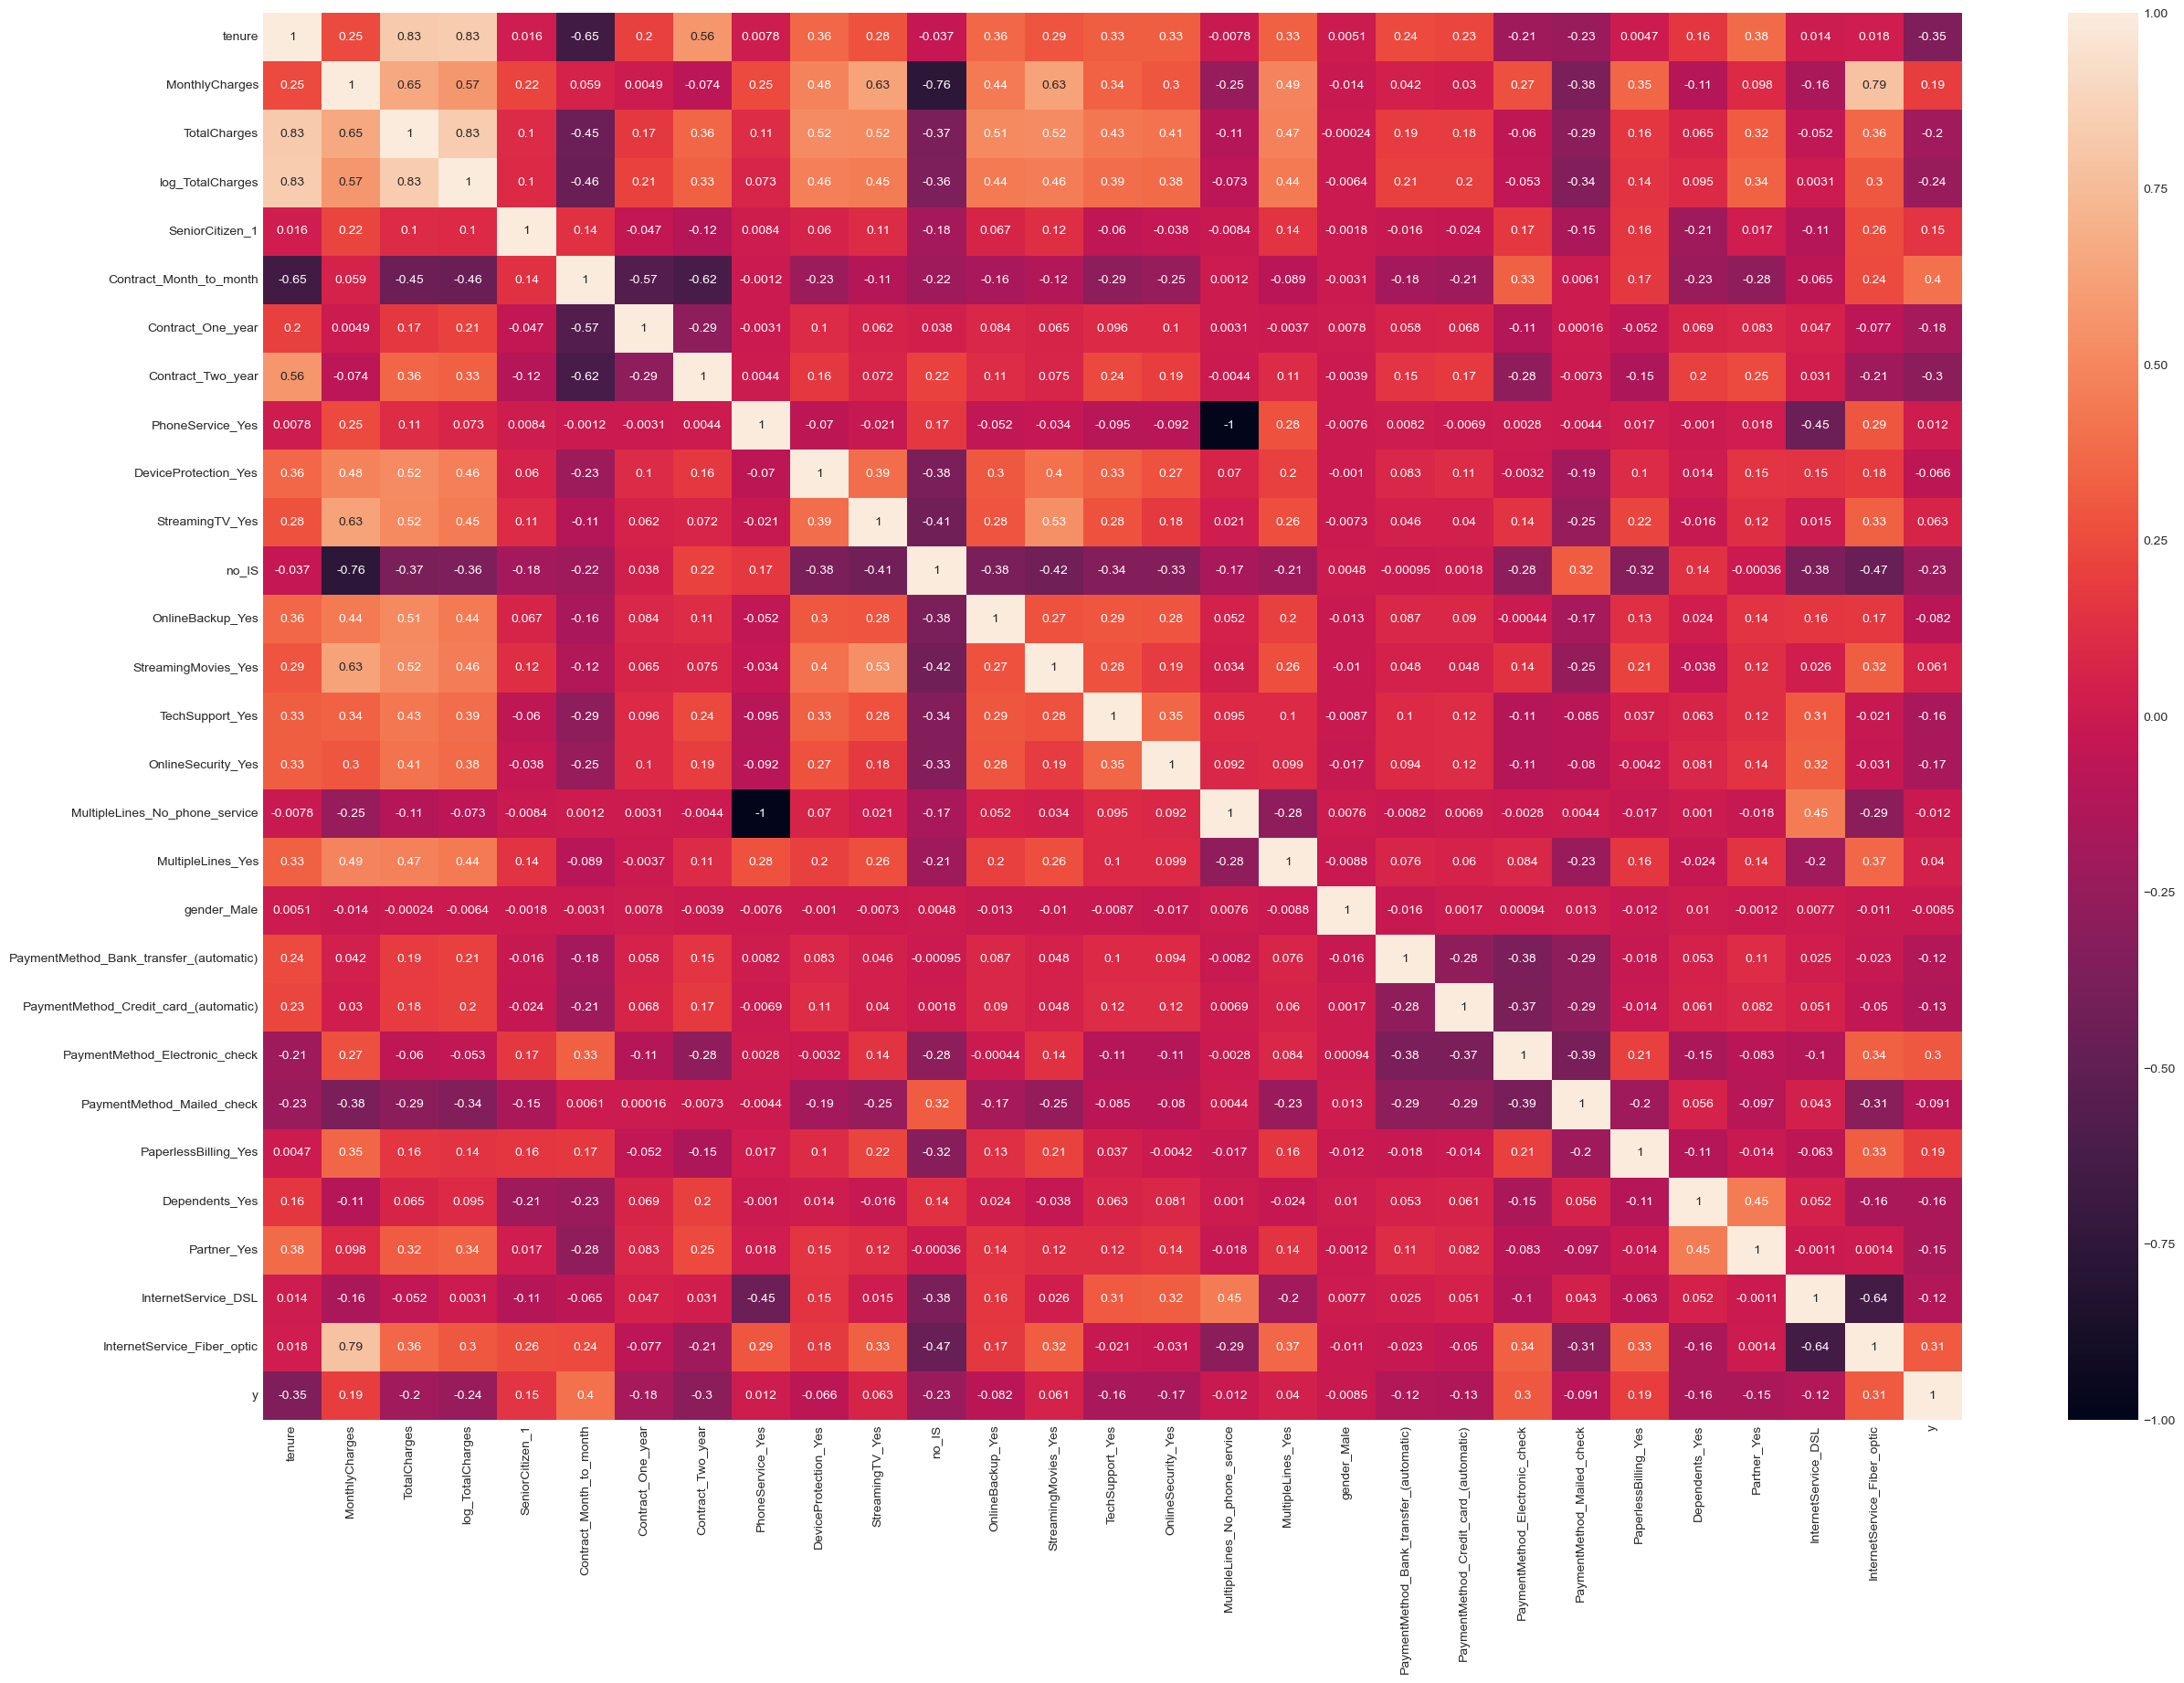

In [124]:
# 변수 삭제 후 선형관계 확인

plt.figure(figsize=(30,20))
sns.heatmap(df_dummies2.corr(), annot=True)
plt.show()

# 'MultipleLines_No phone service'의 삭제가 필요해 보임

In [125]:
# 'MultipleLines_No phone service' 삭제

df_dummies3 = df_dummies2.drop(columns=['MultipleLines_No_phone_service'])

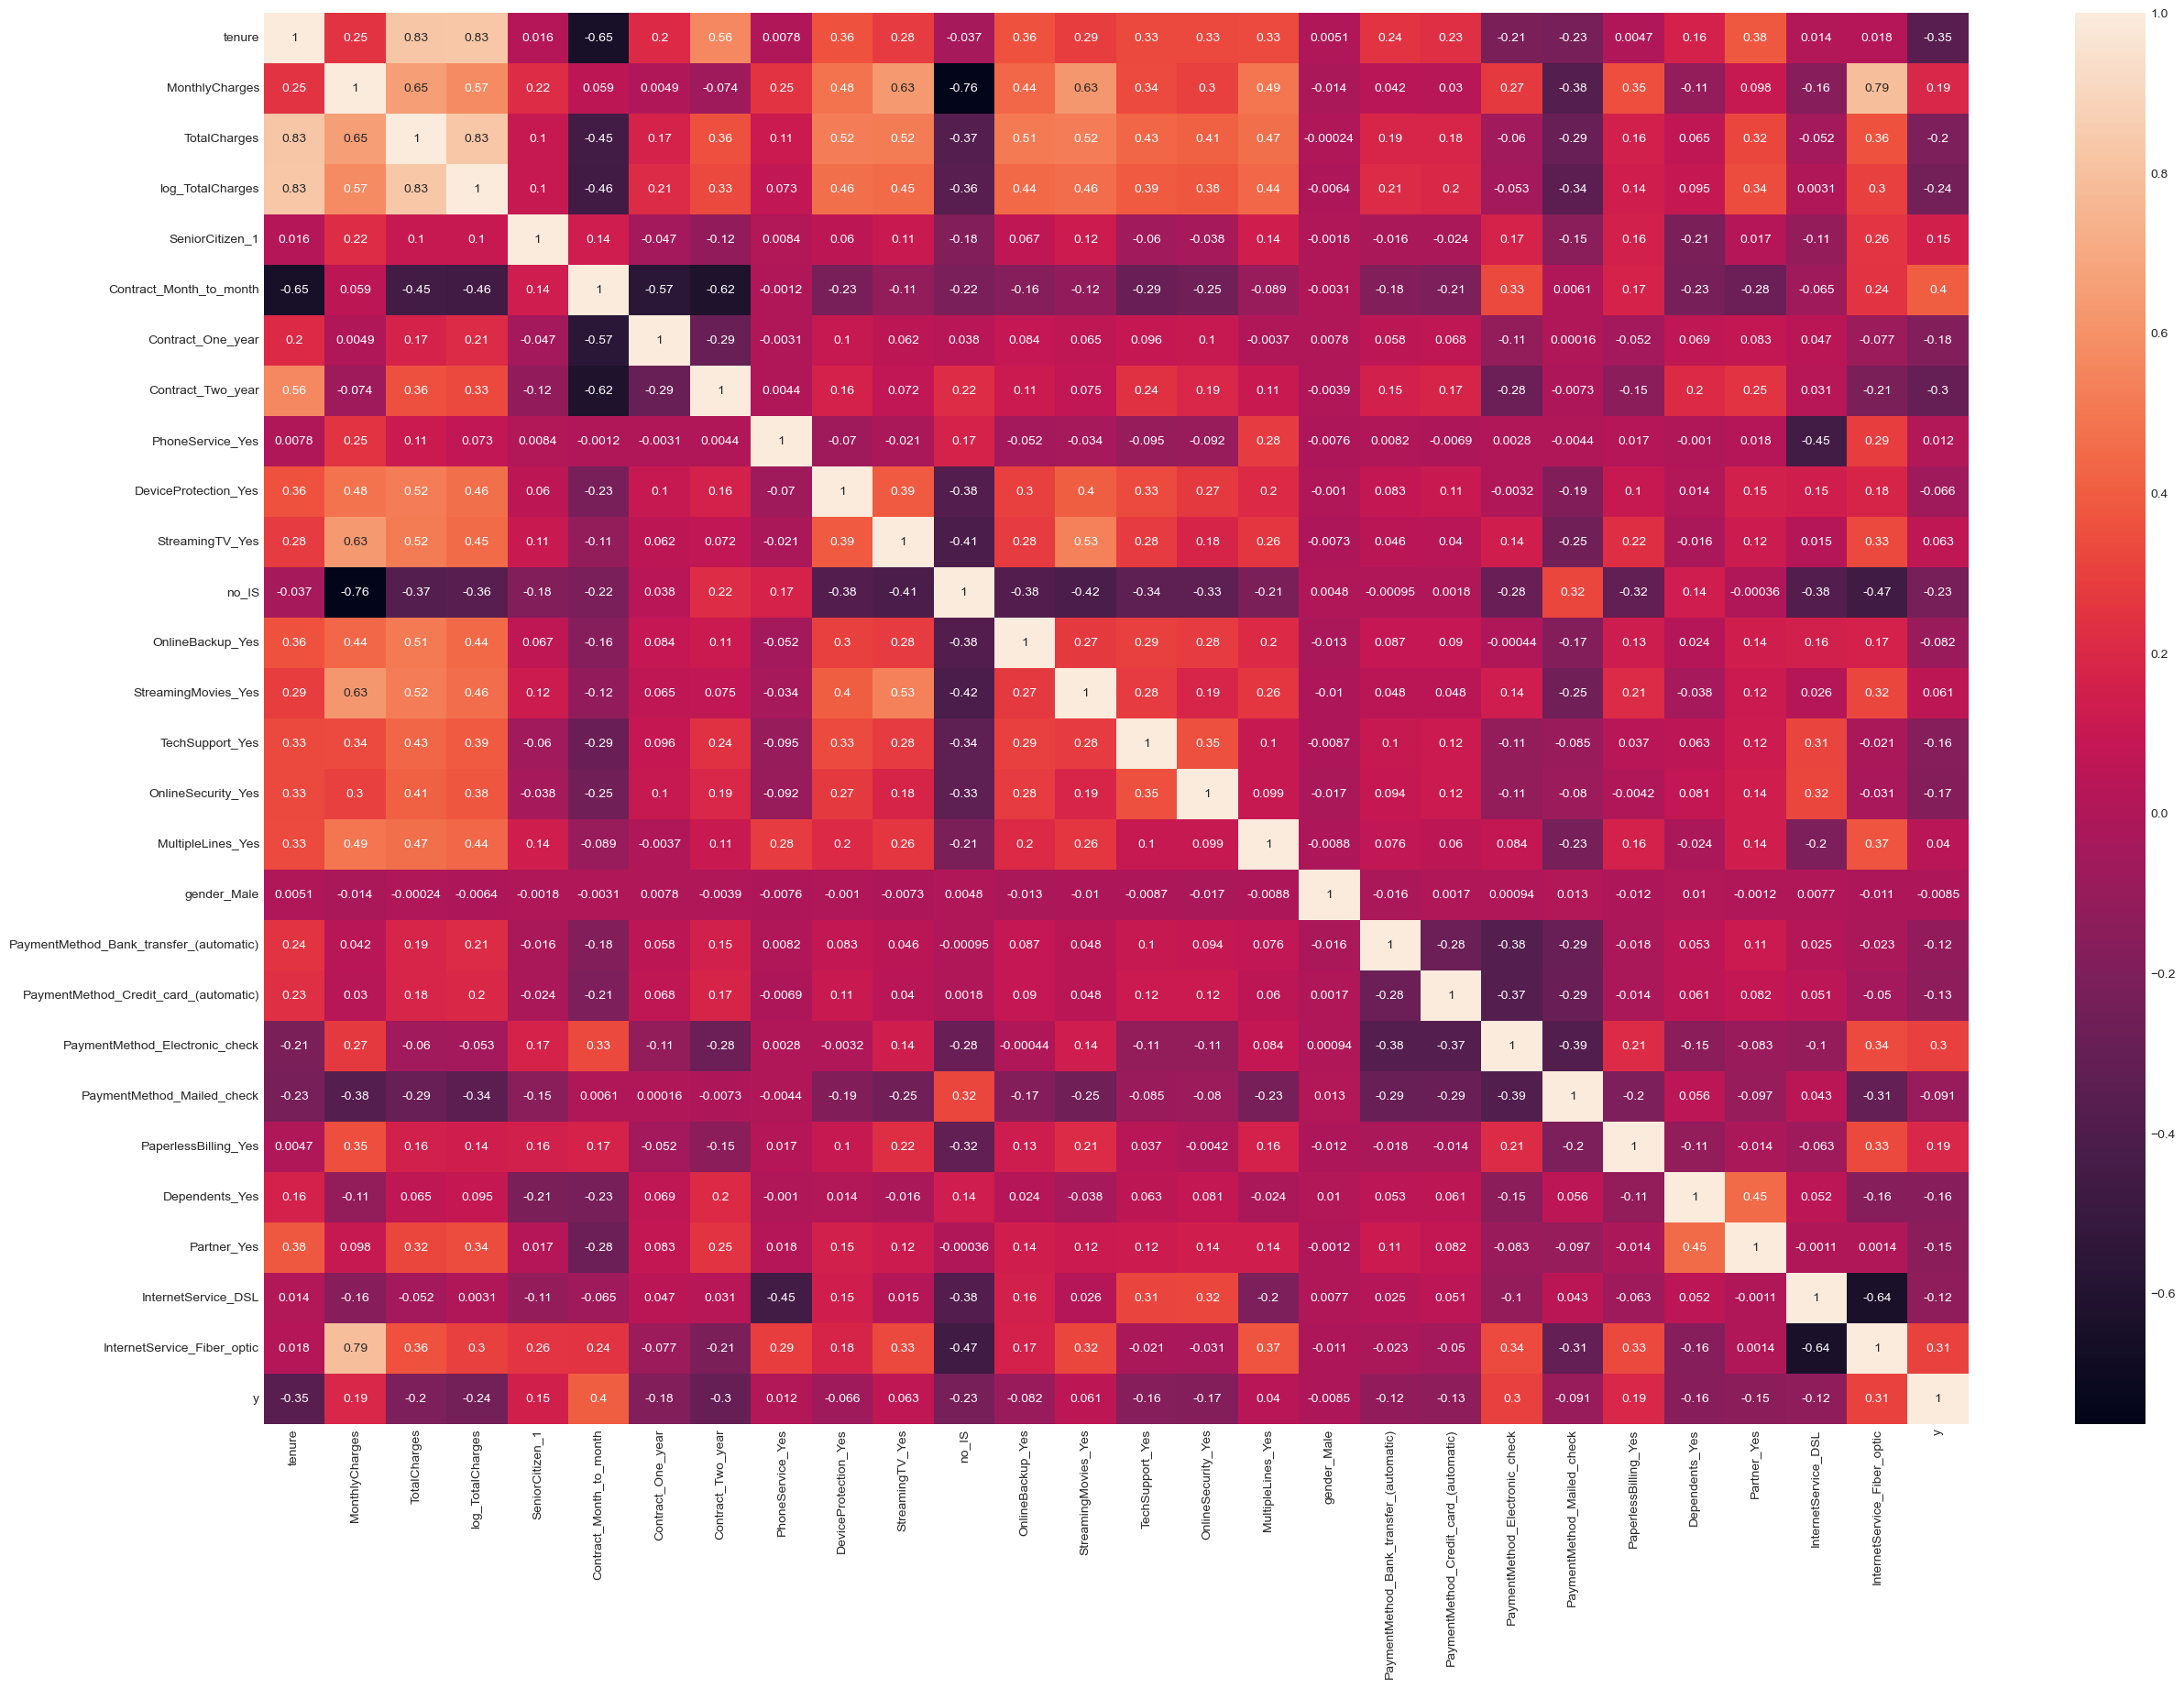

In [126]:
# 변수 삭제 후 선형관계 확인

plt.figure(figsize=(30,20))
sns.heatmap(df_dummies3.corr(), annot=True)
plt.show()

In [127]:
# 변수간의 극단적인 correlation이 줄어듦
# 위 변수로 일단 회귀분석 시작

In [134]:
target = df_dummies3['y']

cols_explains = df_dummies3.columns[2:-1]

X = df_dummies3.loc[:,cols_explains]

In [135]:
model = sm.GLM(endog = target, exog = sm.add_constant(X), family = sm.families.Binomial())

fit = model.fit()

print(fit.summary())
print('AIC : {0:.4f}'.format(fit.aic))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 7031
Model:                            GLM   Df Residuals:                     7006
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2860.4
Date:                Thu, 16 Mar 2023   Deviance:                       5720.8
Time:                        18:23:33   Pearson chi2:                 7.08e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2914
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [54]:
# p-value가 높은 변수 삭제
# stepwise 방식

In [55]:
df_dummies3.to_csv('telecom_dummy.csv', index=False) # R로 진행

In [171]:
# stepwise 후 선택된 변수

state = '''MonthlyCharges + log_TotalCharges + TechSupport_Yes + 
    StreamingMovies_Yes + DeviceProtection_Yes + OnlineSecurity_Yes + 
    SeniorCitizen_1 + Contract_Month_to_month + Contract_One_year + 
    PaymentMethod_Electronic_check + StreamingTV_Yes + PaperlessBilling_Yes + 
    no_IS + InternetService_DSL + MultipleLines_Yes'''

In [172]:
state = state.replace('\n', '')
state

'MonthlyCharges + log_TotalCharges + TechSupport_Yes +     StreamingMovies_Yes + DeviceProtection_Yes + OnlineSecurity_Yes +     SeniorCitizen_1 + Contract_Month_to_month + Contract_One_year +     PaymentMethod_Electronic_check + StreamingTV_Yes + PaperlessBilling_Yes +     no_IS + InternetService_DSL + MultipleLines_Yes'

In [173]:
state = state.replace(' + ', ' ')

In [175]:
states = state.split(' ')

In [176]:
cols = []

for i in range(len(states)):
    if states[i] != '':
        cols.append(states[i])

In [179]:
cols

['MonthlyCharges',
 'log_TotalCharges',
 'TechSupport_Yes',
 'StreamingMovies_Yes',
 'DeviceProtection_Yes',
 'OnlineSecurity_Yes',
 'SeniorCitizen_1',
 'Contract_Month_to_month',
 'Contract_One_year',
 'PaymentMethod_Electronic_check',
 'StreamingTV_Yes',
 'PaperlessBilling_Yes',
 'no_IS',
 'InternetService_DSL',
 'MultipleLines_Yes']

In [180]:
X = df_dummies3.loc[:,cols]

In [181]:
model1 = sm.GLM(endog = target, exog = sm.add_constant(X), family = sm.families.Binomial())

fit1 = model1.fit()

print(fit1.summary())
print('AIC : {0:.4f}'.format(fit1.aic))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 7031
Model:                            GLM   Df Residuals:                     7015
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2863.0
Date:                Thu, 16 Mar 2023   Deviance:                       5725.9
Time:                        18:37:42   Pearson chi2:                 7.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2909
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [182]:
def draw_roc_curve(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 10))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

In [183]:
def model_diag(fit, X):
    prob = fit.predict(sm.add_constant(X))

    treshold = 0.5

    pred = (prob > treshold) + 0

    final_cm = metrics.confusion_matrix(target, pred)
    print('Confusion matric \n', final_cm)

    print('Accuracy of the model : ', metrics.accuracy_score(target, pred).round(4))
    print('Recall : ', metrics.recall_score(target, pred).round(4))

    tn = final_cm[0,0]
    fn = final_cm[1,0]
    fp = final_cm[0,1]
    tp = final_cm[1,1]

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    false_positive_rate = 1 - specificity
    positive_predictive_rate = tp / (tp + fp)
    negative_predictive_rate = tn / (tn + fn)

    print('treshold : ', treshold)
    print('sensitivity : ', sensitivity.round(3))
    print('specificity : ', specificity.round(3))
    print('false_positive_rate : ', false_positive_rate.round(3))
    print('positive_predictive_rate : ', positive_predictive_rate.round(3))
    print('negative_predictive_rate : ', negative_predictive_rate.round(3))

    draw_roc_curve(target, prob)

Confusion matric 
 [[4688  474]
 [ 874  995]]
Accuracy of the model :  0.8083
Recall :  0.5324
treshold :  0.5
sensitivity :  0.532
specificity :  0.908
false_positive_rate :  0.092
positive_predictive_rate :  0.677
negative_predictive_rate :  0.843


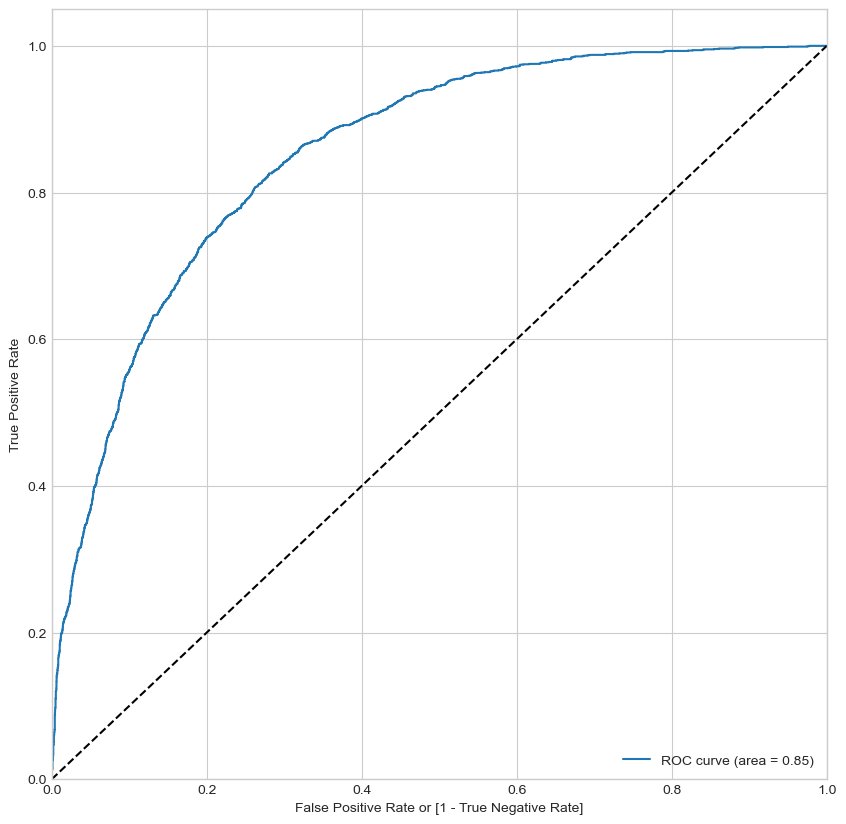

In [184]:
model_diag(fit1, X)

In [185]:
# 추정치가 모두 유의하진 않지만 ROC그림과 AUC이 괜찮게 나옴
# 잠정모델으로 결정

In [186]:
# colinearity 확인

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [187]:
formula = 'y ~ ' + ' + '.join(cols)

y_vif, X_vif = dmatrices(formula, return_type='dataframe', data=df_dummies3)

df_vif = pd.DataFrame()

df_vif['colname'] = X_vif.columns

df_vif['VIF'] = [vif(X_vif.values,i) for i in range(X_vif.shape[1])]

df_vif

# 10 이상이면 다중공선성이 있다고 판단함
# MonthlyCharges에서 가장 큰 값을 가짐
# 아무래도 'MonthlyCharges'와 'TotalCharges'는 관계가 있을 수 밖에 없음

,colname,VIF
0,Intercept,220.987113
1,MonthlyCharges,29.243174
2,log_TotalCharges,2.582515
3,TechSupport_Yes,1.706544
4,StreamingMovies_Yes,2.316710
5,DeviceProtection_Yes,1.646550
6,OnlineSecurity_Yes,1.627082
7,SeniorCitizen_1,1.109034
8,Contract_Month_to_month,2.909017
9,Contract_One_year,1.588274


In [188]:
X_temp = X.drop(columns=['MonthlyCharges'])

cols = X_temp.columns

formula = 'y ~ ' + ' + '.join(cols)

y_vif, X_vif = dmatrices(formula, return_type='dataframe', data=df_dummies3)

df_vif = pd.DataFrame()

df_vif['colname'] = X_vif.columns

df_vif['VIF'] = [vif(X_vif.values,i) for i in range(X_vif.shape[1])]

df_vif

# 모든 변수의 vif가 10 이하로 내려옴

,colname,VIF
0,Intercept,78.835709
1,log_TotalCharges,2.556599
2,TechSupport_Yes,1.479119
3,StreamingMovies_Yes,1.646290
4,DeviceProtection_Yes,1.479569
5,OnlineSecurity_Yes,1.409946
6,SeniorCitizen_1,1.106766
7,Contract_Month_to_month,2.906385
8,Contract_One_year,1.586738
9,PaymentMethod_Electronic_check,1.293454


In [189]:
model2 = sm.GLM(endog = target, exog = sm.add_constant(X_temp), family = sm.families.Binomial())

fit2 = model2.fit()

print(fit2.summary())
print('AIC : {0:.4f}'.format(fit2.aic))

# 'MonthlyCharges'를 제거했더니 'DeviceProtection_Yes'값이 유의하지 않아짐
# 제거하기로 결정

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 7031
Model:                            GLM   Df Residuals:                     7016
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2866.1
Date:                Thu, 16 Mar 2023   Deviance:                       5732.3
Time:                        18:37:45   Pearson chi2:                 7.16e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2902
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [190]:
model3 = sm.GLM(endog = target, exog = sm.add_constant(X_temp.drop(columns=['DeviceProtection_Yes'])),
                family = sm.families.Binomial())

fit3 = model3.fit()

print(fit3.summary())
print('AIC : {0:.4f}'.format(fit3.aic))

# 모든 값이 유의하게 나옴

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 7031
Model:                            GLM   Df Residuals:                     7017
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2866.5
Date:                Thu, 16 Mar 2023   Deviance:                       5733.0
Time:                        18:37:46   Pearson chi2:                 7.14e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2902
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [191]:
cols = X_temp.drop(columns=['DeviceProtection_Yes']).columns

formula = 'y ~ ' + ' + '.join(cols)

y_vif, X_vif = dmatrices(formula, return_type='dataframe', data=df_dummies3)

df_vif = pd.DataFrame()

df_vif['colname'] = X_vif.columns

df_vif['VIF'] = [vif(X_vif.values,i) for i in range(X_vif.shape[1])]

df_vif

# 최종 모델로 결정

fit_ = fit3
X_ = X_temp.drop(columns=['DeviceProtection_Yes'])

In [192]:
# 최종 모델의 vif

X_temp = X_

cols = X_temp.columns

formula = 'y ~ ' + ' + '.join(cols)

y_vif, X_vif = dmatrices(formula, return_type='dataframe', data=df_dummies3)

df_vif = pd.DataFrame()

df_vif['colname'] = X_vif.columns

df_vif['VIF'] = [vif(X_vif.values,i) for i in range(X_vif.shape[1])]

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 7031
Model:                            GLM   Df Residuals:                     7017
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2866.5
Date:                Thu, 16 Mar 2023   Deviance:                       5733.0
Time:                        18:37:47   Pearson chi2:                 7.14e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2902
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

,colname,VIF
0,Intercept,78.835230
1,log_TotalCharges,2.511630
2,TechSupport_Yes,1.472785
3,StreamingMovies_Yes,1.618176
4,OnlineSecurity_Yes,1.408965
5,SeniorCitizen_1,1.106691
6,Contract_Month_to_month,2.873823
7,Contract_One_year,1.584299
8,PaymentMethod_Electronic_check,1.291866
9,StreamingTV_Yes,1.618513


Confusion matric 
 [[4690  472]
 [ 875  994]]
Accuracy of the model :  0.8084
Recall :  0.5318
treshold :  0.5
sensitivity :  0.532
specificity :  0.909
false_positive_rate :  0.091
positive_predictive_rate :  0.678
negative_predictive_rate :  0.843


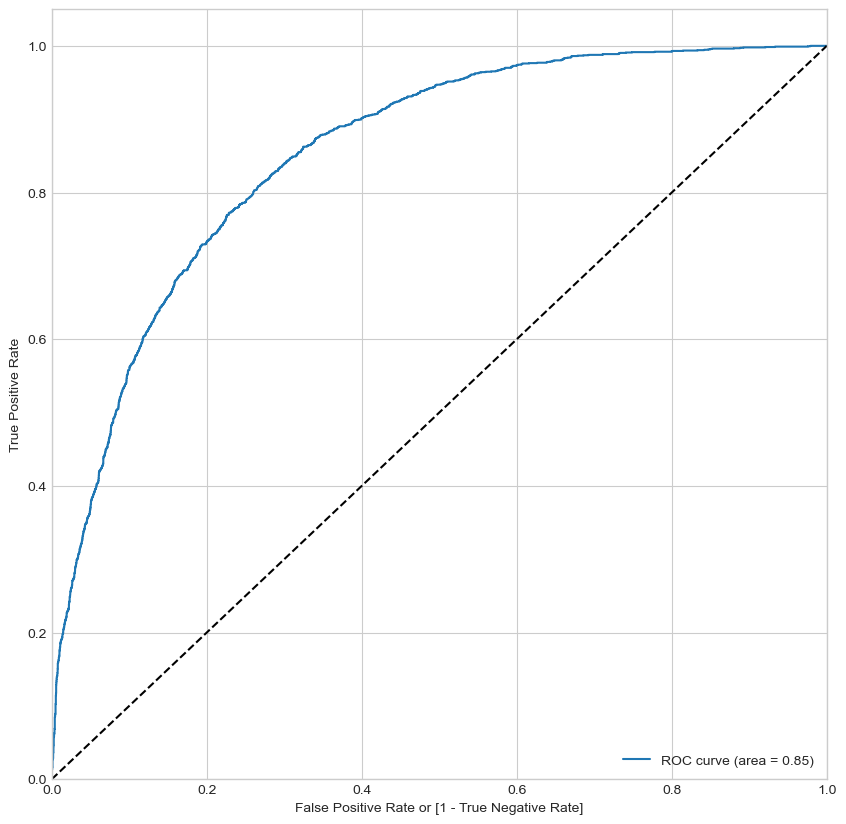

In [193]:
print(fit_.summary())
display(df_vif)
model_diag(fit_, X_)

In [194]:
pred = (fit_.predict()>0.5) + 0

In [195]:
R = pd.DataFrame(pred, columns=['pred'])
R['y'] = target

In [196]:
R.corr()

,pred,y
pred,1.000000,0.478916
y,0.478916,1.000000
